In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install segmentation-models

In [ ]:
!pip install tf-semantic-segmentation

In [ ]:
import segmentation_models as sm
sm.set_framework('tf.keras')
sm.framework()

In [ ]:
import tf_semantic_segmentation
from tf_semantic_segmentation import models

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from google.colab import files
import os
import glob
import sklearn
import random
import sys
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [ ]:
train_images = []
# SIZE_X = 640
# SIZE_Y = 480

img_names = glob.glob("/content/drive/MyDrive/inżynierka/dataset-inż/marked/dataset_marked_1/JPEGImages/*.png")
img_names.sort()
print(img_names)
mask_names = glob.glob("/content/drive/MyDrive/inżynierka/dataset-inż/marked/dataset_marked_1/SegmentationClass/*.png")
mask_names.sort()
print(mask_names)
for img in img_names:
      img = cv2.imread(img, cv2.IMREAD_COLOR)       
      # img = cv2.resize(img, (SIZE_X, SIZE_Y))
      img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
      train_images.append(img)
     
train_images = np.array(train_images)

train_masks = [] 
for mask in mask_names:
      mask = cv2.imread(mask, 0)       
      # mask = cv2.resize(mask, (SIZE_X, SIZE_Y))
      train_masks.append(mask)
        
train_masks = np.array(train_masks, dtype=np.bool)

['/content/drive/MyDrive/inżynierka/dataset-inż/marked/dataset_marked_1/JPEGImages/0001.png', '/content/drive/MyDrive/inżynierka/dataset-inż/marked/dataset_marked_1/JPEGImages/0002.png', '/content/drive/MyDrive/inżynierka/dataset-inż/marked/dataset_marked_1/JPEGImages/0003.png', '/content/drive/MyDrive/inżynierka/dataset-inż/marked/dataset_marked_1/JPEGImages/0004.png', '/content/drive/MyDrive/inżynierka/dataset-inż/marked/dataset_marked_1/JPEGImages/0005.png', '/content/drive/MyDrive/inżynierka/dataset-inż/marked/dataset_marked_1/JPEGImages/0006.png', '/content/drive/MyDrive/inżynierka/dataset-inż/marked/dataset_marked_1/JPEGImages/0007.png', '/content/drive/MyDrive/inżynierka/dataset-inż/marked/dataset_marked_1/JPEGImages/0008.png', '/content/drive/MyDrive/inżynierka/dataset-inż/marked/dataset_marked_1/JPEGImages/0009.png', '/content/drive/MyDrive/inżynierka/dataset-inż/marked/dataset_marked_1/JPEGImages/0010.png', '/content/drive/MyDrive/inżynierka/dataset-inż/

In [ ]:
X = train_images
Y = train_masks
Y = np.expand_dims(Y, axis = 3)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# x_train = (x_train.astype('float32')) / 255.0
# x_val = (x_val.astype('float32')) / 255.0

(480, 640, 3)
[[[127 132 130]
  [127 132 130]
  [127 132 129]
  ...
  [122 127 124]
  [118 123 119]
  [113 117 116]]

 [[ 65  74  70]
  [ 65  74  70]
  [ 66  74  67]
  ...
  [ 81  92  85]
  [ 79  90  83]
  [ 76  85  82]]

 [[ 72  77  73]
  [ 72  76  72]
  [ 70  76  69]
  ...
  [ 82  92  85]
  [ 79  89  82]
  [ 75  84  81]]

 ...

 [[ 79  90  88]
  [ 79  89  88]
  [ 81  90  89]
  ...
  [164 171 169]
  [154 163 157]
  [145 155 147]]

 [[ 84  90  86]
  [ 83  89  85]
  [ 83  87  86]
  ...
  [168 173 173]
  [156 165 161]
  [147 155 151]]

 [[ 90  91  85]
  [ 89  90  84]
  [ 86  87  82]
  ...
  [169 172 176]
  [160 164 166]
  [150 155 155]]]


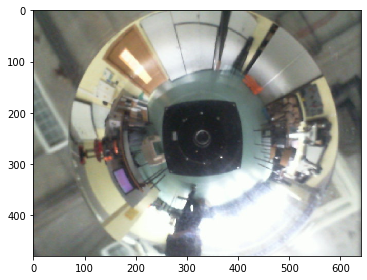

(480, 640)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


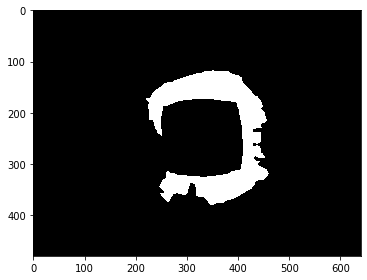

In [ ]:
image_x = random.randint(0, len(x_train)-1)
check_train = x_train[image_x]
check_mask = np.squeeze(y_train[image_x])
imshow(check_train)
print(np.shape(check_train))
print(check_train)
plt.show()
imshow(check_mask)
print(np.shape(check_mask))
print(check_mask)

In [ ]:
print("(num_images, height, width, num_channels)")
print(f"shape(x_train): {np.shape(x_train)}")
print(f"shape(y_train): {np.shape(y_train)}")
print(f"shape(x_val): {np.shape(x_val)}")
print(f"shape(y_val): {np.shape(y_val)}")

(num_images, height, width, num_channels)
shape(x_train): (235, 480, 640, 3)
shape(y_train): (235, 480, 640, 1)
shape(x_val): (59, 480, 640, 3)
shape(y_val): (59, 480, 640, 1)


In [ ]:
model_erfnet_ = models.erfnet(input_shape=(480, 640, 3), num_classes=1)
model_erfnet_.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

callbacks = [
             # tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=9),
             tf.keras.callbacks.TensorBoard(log_dir='logs_'),
             tf.keras.callbacks.ModelCheckpoint('erfnet_labbot.h5', verbose=1, save_best_only=True)
]

2021-10-28 10:26:01,146 - DEBUG - downsample: {'x': <KerasTensor: shape=(None, 480, 640, 3) dtype=float32 (created by layer 'inputs')>, 'n': 16, 'activation': 'relu', 'norm': None, 'l2': None}
2021-10-28 10:26:01,189 - DEBUG - downsample: {'x': <KerasTensor: shape=(None, 240, 320, 16) dtype=float32 (created by layer 'concatenate_9')>, 'n': 64, 'activation': 'relu', 'norm': None, 'l2': None}
2021-10-28 10:26:01,219 - DEBUG - factorized: {'x': <KerasTensor: shape=(None, 120, 160, 64) dtype=float32 (created by layer 'concatenate_10')>, 'dropout': 0.3, 'dilation': [1, 1], 'l2': None}
2021-10-28 10:26:01,280 - DEBUG - factorized: {'x': <KerasTensor: shape=(None, 120, 160, 64) dtype=float32 (created by layer 'add_51')>, 'dropout': 0.3, 'dilation': [1, 1], 'l2': None}
2021-10-28 10:26:01,341 - DEBUG - factorized: {'x': <KerasTensor: shape=(None, 120, 160, 64) dtype=float32 (created by layer 'add_52')>, 'dropout': 0.3, 'dilation': [1, 1], 'l2': None}
2021-10-28 10:26:01,418 - DEBUG - factorize

In [ ]:
model_erfnet_.summary()
# tf.keras.utils.plot_model(model_erfnet_, 'modelerfnet.png')

In [ ]:
history = model_erfnet_.fit(
    x_train, y_train,
    batch_size=10,
    epochs=70,
    verbose=1,
    # validation_split=0.1,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/70
24/24 [==============================] - 50s 2s/step - loss: 1.7317 - accuracy: 0.8183 - val_loss: 9.7656 - val_accuracy: 0.2790

Epoch 00001: val_loss improved from inf to 9.76555, saving model to erfnet_labbot.h5
Epoch 2/70
24/24 [==============================] - 41s 2s/step - loss: 1.0323 - accuracy: 0.8914 - val_loss: 8.1629 - val_accuracy: 0.3520

Epoch 00002: val_loss improved from 9.76555 to 8.16292, saving model to erfnet_labbot.h5
Epoch 3/70
24/24 [==============================] - 41s 2s/step - loss: 0.8912 - accuracy: 0.9176 - val_loss: 3.9816 - val_accuracy: 0.6415

Epoch 00003: val_loss improved from 8.16292 to 3.98162, saving model to erfnet_labbot.h5
Epoch 4/70
24/24 [==============================] - 41s 2s/step - loss: 0.8587 - accuracy: 0.9198 - val_loss: 2.1913 - val_accuracy: 0.7844

Epoch 00004: val_loss improved from 3.98162 to 2.19131, saving model to erfnet_labbot.h5
Epoch 5/70
24/24 [==============================] - 41s 2s/step - loss: 0.8312 - acc

In [ ]:
preds_train = model_erfnet_.predict(x_train, verbose=1)
preds_val = model_erfnet_.predict(x_val, verbose=1)


preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

2/2 [==============================] - 2s 1s/step


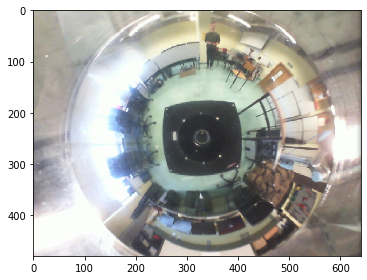

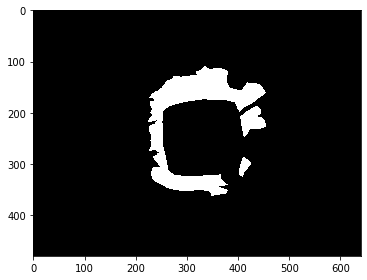

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


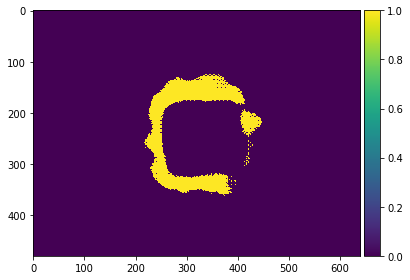

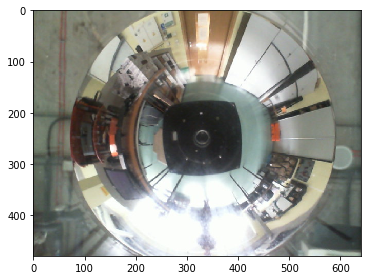

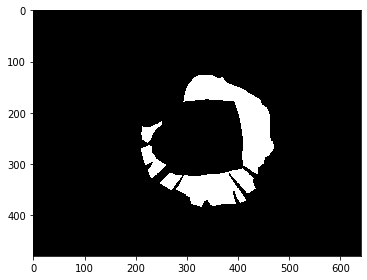

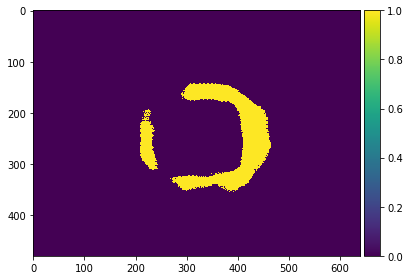

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
img_3 = x_train[ix]
imshow(img_3)
plt.show()
img_2 = np.squeeze(y_train[ix])
imshow(img_2)
plt.show()
img_1 = np.squeeze(preds_train_t[ix])
imshow(img_1)
plt.show()

ix = random.randint(0, len(preds_val_t))
imshow(x_val[ix])
plt.show()
imshow(np.squeeze(y_val[ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()
print(img_1)

In [ ]:
model_erfnet_.save('erfnet_labbot_70.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
idx = random.randint(0, len(x_train)-1)


# preds_train = model_erfnet_.predict(x_train[:int(x_train.shape[0]*0.9)], verbose=1)
# preds_val = model_erfnet_.predict(x_train[int(x_train.shape[0]*0.9):], verbose=1)
# preds_test = model_erfnet_.predict(x_val, verbose=1)

preds_train = model_erfnet_.predict(x_train, verbose=1)
preds_val = model_erfnet_.predict(x_val, verbose=1)


preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
img_3 = x_train[ix]
imshow(img_3)
plt.show()
img_2 = np.squeeze(y_train[ix])
imshow(img_2)
plt.show()
img_1 = np.squeeze(preds_train_t[ix])
imshow(img_1)
plt.show()

# Perform a sanity check on some random validation samples
# ix = random.randint(0, len(preds_val_t))
# imshow(x_train[int(x_train.shape[0]*0.9):][ix])
# plt.show()
# imshow(np.squeeze(y_train[int(y_train.shape[0]*0.9):][ix]))
# plt.show()
# imshow(np.squeeze(preds_val_t[ix]))
# plt.show()
# print(img_1)

ix = random.randint(0, len(preds_val_t))
imshow(x_val[ix])
plt.show()
imshow(np.squeeze(y_val[ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()
print(img_1)

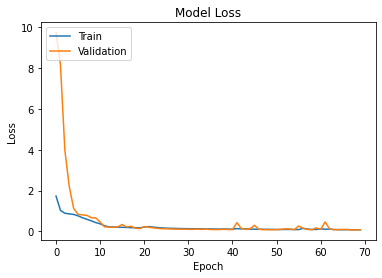

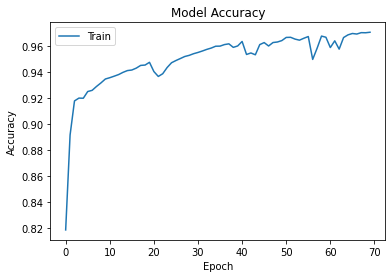

In [ ]:
          plt.plot(history.history['loss'])
          plt.plot(history.history['val_loss'])
          plt.title('Model Loss')
          plt.ylabel('Loss')
          plt.xlabel('Epoch')
          plt.legend(['Train', 'Validation'], loc='upper left')
          plt.show()
          plt.plot(history.history['accuracy'])
          #plt.plot(history.history['val_acc'])
          plt.title('Model Accuracy')
          plt.ylabel('Accuracy')
          plt.xlabel('Epoch')
          plt.legend(['Train', 'Validation'], loc='upper left')
          plt.show()